In [1]:
import os
os.chdir("/home/weedsci/matt/SemiF-AnnotationPipeline")

from pathlib import Path
import random
import matplotlib.pyplot as plt
import numpy as np
from semif_utils.utils import make_exg, make_kmeans, otsu_thresh, reduce_holes, make_exg_minus_exr, apply_mask, crop_cutouts, get_image_meta, thresh_vi, contour_mask
from semif_utils.segment_utils import  prep_bbox
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)


/home/weedsci/miniconda3/envs/semif/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
metadir = Path("./data/semifield-developed-images/MD_2022-07-01/metadata/")
random.seed(42)
rdn = random.randint(0,200)
labels = [str(x) for x in (metadir).glob("*.json")][rdn]

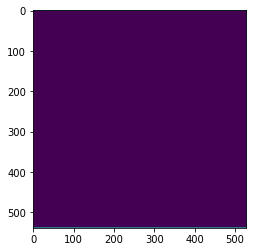

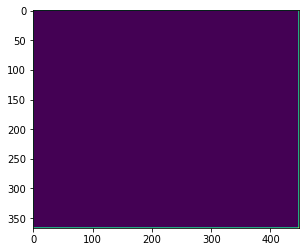

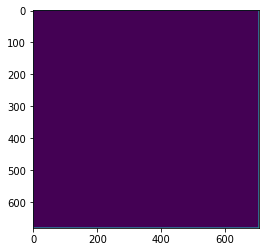

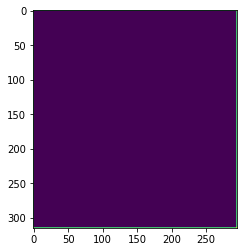

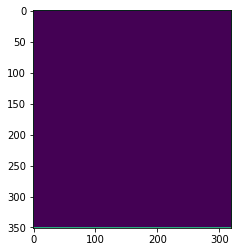

In [13]:
from scipy import ndimage as ndi
from skimage.exposure import rescale_intensity
import cv2

imgdata = get_image_meta(labels)
# Call image array
rgb_array = imgdata.array
# Get bboxes
bboxes = imgdata.bboxes
## Process on images by individual bbox detection
cutout_num = 0
cutout_ids = []

# for box in bboxes:
for box in bboxes[:5]:
    scale = [imgdata.fullres_width, imgdata.fullres_height]
    _, x1, y1, x2, y2 = prep_bbox(box, scale)
    # Crop image to bbox
    rgb_crop = rgb_array[y1:y2, x1:x2]
    lab = cv2.cvtColor(rgb_crop,cv2.COLOR_RGB2LAB)
    l, a, b  = cv2.split(lab)
    img = 2*a - l - b
    blur = cv2.GaussianBlur(img,(5,5),0)

    # thresholds = filters.threshold_multiotsu(blur, classes=3)
    # regions = np.digitize(blur, bins=thresholds)
    # plant = blur > thresholds[1]
    
    # distance = ndi.distance_transform_edt(plant)
    # local_max_coords = feature.peak_local_max(distance, min_distance=3)
    # local_max_mask = np.zeros(distance.shape, dtype=bool)
    # local_max_mask[tuple(local_max_coords.T)] = True
    # markers = measure.label(local_max_mask)

    # segmented_plant = segmentation.watershed(-distance, markers, mask=plant)


    # rescaled_plant = rescale_intensity(segmented_plant, out_range=(0, 255))
    # binary_plant = np.where(rescaled_plant != 0, 1, 0)
    # kernel = np.ones((3,3))
    
    # opening = cv2.morphologyEx(binary_plant.astype(float), cv2.MORPH_OPEN, kernel)
    # holed_mask = reduce_holes(opening, min_object_size=200, min_hole_size=500)
    # cutout = apply_mask(rgb_crop, holed_mask, "black")
    
    # # cropped_cutout = crop_cutouts(cutout)
    # exg_vi = make_exg(cutout, thresh=True)
    # th_vi = thresh_vi(exg_vi, low=10, upper=50)
    # kmean = make_kmeans(th_vi)
    # holed_mask = reduce_holes(kmean, min_object_size=20, min_hole_size=50)

    # cropped_cutout = crop_cutouts(kmean)
    contours_mask, hierachy = cv2.findContours(blur, cv2.RETR_EXTERNAL,
                                            cv2.CHAIN_APPROX_NONE)
    mask = np.zeros(blur.shape, np.uint8)
    # find the biggest countour (c) by the area
    
    
    # cv2.drawContours(mask, contours_mask, 0,(255,0,255), -1)
    # print(mask.max())
    # print(mask.min())
    # c = max(contours_mask, key = cv2.contourArea)
    cv2.drawContours(mask, contours_mask,hierachy, -1, (255),1)
    # mask = contour_mask(binary_plant.astype(np.uint8))
    # cutout = apply_mask(rgb_crop, holed_mask, "black")
    plt.imshow(mask)
    plt.show()

<frozen importlib._bootstrap>:228: RuntimeWarning: sklearn.tree._criterion.Criterion size changed, may indicate binary incompatibility. Expected 328 from C header, got 352 from PyObject


ValueError: sklearn.tree._criterion.ClassificationCriterion size changed, may indicate binary incompatibility. Expected 1168 from C header, got 368 from PyObject